<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seminar-plan" data-toc-modified-id="Seminar-plan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seminar plan</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task</a></span><ul class="toc-item"><li><span><a href="#Request" data-toc-modified-id="Request-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Request</a></span></li><li><span><a href="#Solution-plan" data-toc-modified-id="Solution-plan-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Solution plan</a></span><ul class="toc-item"><li><span><a href="#ML-task-from-business-task" data-toc-modified-id="ML-task-from-business-task-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>ML task from business task</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Dataset</a></span></li></ul></li></ul></li><li><span><a href="#Solution" data-toc-modified-id="Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solution</a></span><ul class="toc-item"><li><span><a href="#Explore-the-target-variable" data-toc-modified-id="Explore-the-target-variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Explore the target variable</a></span></li><li><span><a href="#Explore-features-and-guess-connections-to-target" data-toc-modified-id="Explore-features-and-guess-connections-to-target-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Explore features and guess connections to target</a></span><ul class="toc-item"><li><span><a href="#Check-for-correct-data-types-and-missing-values" data-toc-modified-id="Check-for-correct-data-types-and-missing-values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Check for correct data types and missing values</a></span></li><li><span><a href="#Look-at-data-and-asses-correlations-to-target" data-toc-modified-id="Look-at-data-and-asses-correlations-to-target-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Look at data and asses correlations to target</a></span></li><li><span><a href="#Questions-to-the-dataset" data-toc-modified-id="Questions-to-the-dataset-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Questions to the dataset</a></span></li></ul></li><li><span><a href="#Build-the-simplest-solution" data-toc-modified-id="Build-the-simplest-solution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build the simplest solution</a></span></li><li><span><a href="#Build-the-second-simplest-solution" data-toc-modified-id="Build-the-second-simplest-solution-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Build the second simplest solution</a></span></li><li><span><a href="#Compare-solutions" data-toc-modified-id="Compare-solutions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare solutions</a></span></li></ul></li><li><span><a href="#Seminar-results" data-toc-modified-id="Seminar-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Seminar results</a></span></li></ul></div>

# Seminar plan
1. Analyze dataset
1. Create simple rule-based predictor based on analysis
1. Evaluate the quality of the prediction
1. Deal with missing data
1. Deal with additional data
1. Evaluate the quality of the prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

Use the line below if you have high DPI screen and don't want Matplotlib plots to be blurry (e.g., if you work on MacBook Pro series or latest ThinkPads).

In [2]:
%config InlineBackend.figure_format = 'retina'

# Task

## Request

A local car workshop asked for help. 

One of their services is preparing used cars for sale: washing, polishing, dry cleaning the interior, fixing small but noticeable issues. Depending on the car (and the amount of money the owner is expecting to get), the number of actions may vary. At least, the workshop owner is absolutely sure that prettifying the Mercedes-Benz SL can cost much more than cleaning up the Ford Focus.

Therefore the workshop's revenue highly depends on how precisely the workshop administrator detected the customer's willingness to pay. The workshop owner thinks that **their workshop needs the system that quickly guesses the used car price from the car's basic characteristics**. Such a system on the workshop administrator's computer will help administrators to evaluate the customer's willingness to pay much more precisely -- and will even help car owners.

The Russian start-up founded from this idea: https://maxposter.ru

## Solution plan

Let's build! We need **the system that quickly guesses the used car price from the car's basic characteristics**. Here's the brief schema:

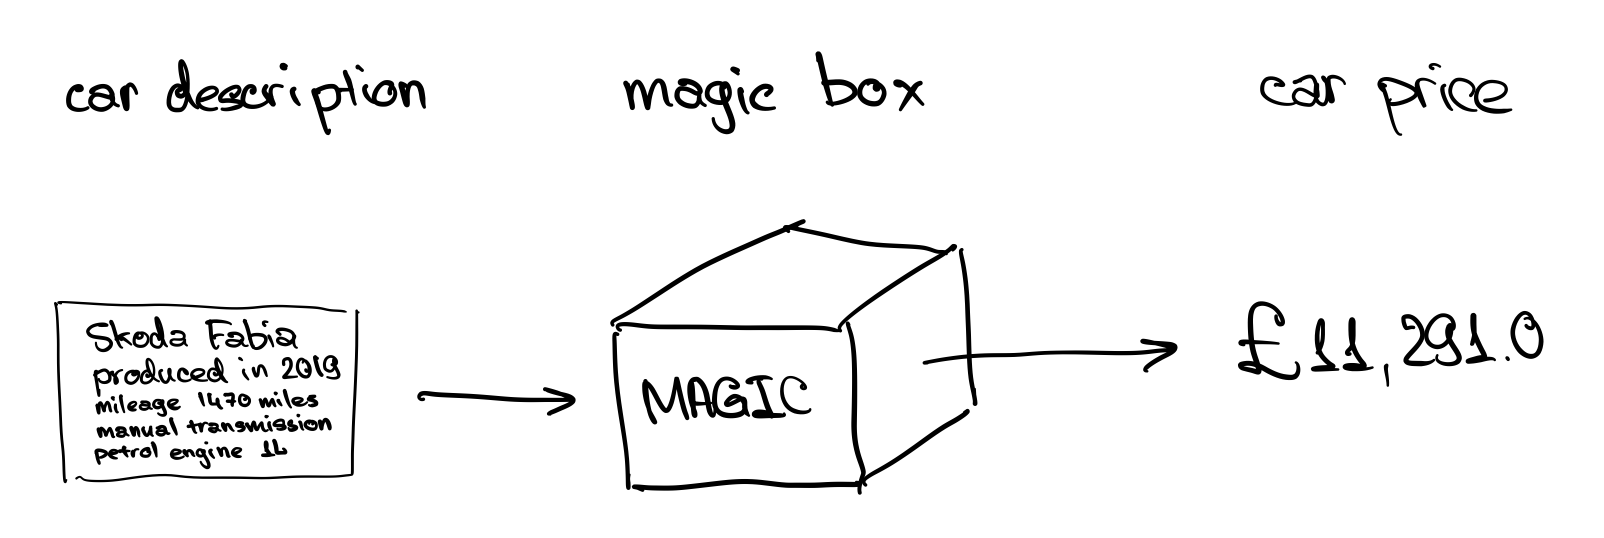

How to build the magic box? Let's collect prices and details about recently sold used cars and build an ML model on these data. ML models perfectly fit the scheme above.

### ML task from business task
To solve a supervised (with answers) ML problem, we need to:
1. Given $\left\lbrace\left(\mathbf x_i, y_i\right)\right\rbrace_{i=1}^N$ -- a set of examples $\mathbf x_i$ from some example space $X$ and labels $\mathbf y_i$ for each of these examples from some label space $Y$
1. Find some algorithm $a: X \to Y$ that approximates the dependency of $y_i$ on $x_i$ as good as possible according to some quality measure

***Q***: What can be an example in this case? What can be the answer?

***Q - complicated***: What can be the quality measure?

***Q***: Which algorithm can we use?

### Dataset
The dataset is already collected:

In [3]:
df = pd.read_csv('../data/cars.csv')

In [4]:
df.sample(5)

brand      model    year transmission  mileage fuelType  \
21570            ford      Focus  2015.0       Manual    51205   Diesel   
90721           focus      Focus  2015.0       Manual    29331   Diesel   
56450   Mercedes-Benz   CL Class  2019.0    Semi-Auto     3647   Petrol   
74633   Mercedes-Benz    A Class  2019.0    Semi-Auto     2555   Petrol   
100811          focus      Focus  2019.0       Manual     3061   Petrol   

          tax   mpg  engineSize  tax(£)  price  
21570    20.0  67.3         1.6     NaN   7650  
90721     NaN   NaN         1.5     NaN   7998  
56450   145.0  40.9         2.0     NaN  37999  
74633   145.0  47.9         1.3     NaN  23980  
100811    NaN   NaN         1.0     NaN  15530

Source: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

\>100K used cars postings from the British used cars site.

- **brand** car manufacturer
- **model** car model
- **year** registration year
- **transmission** type of gearbox (Manual, Semi-Auto, Automatic, Other)
- **mileage** distance used, miles
- **fuelType** engine fuel type (Diesel, Petrol, Hybrid, Electric, Other)
- **tax** road tax, £
- **mpg** miles per gallon (how many miles car can cover using 1 gallon of fuel; more miles -- less money spent on fuel)
- **engineSize** engine size (volume) in litres
- **tax(£)** road tax, £
- **price** car price, £

In [5]:
df.loc[df.price.sort_values()[-5:].index]

brand      model    year transmission  mileage fuelType    tax  \
50679  Mercedes-Benz    A Class  2019.0    Semi-Auto      785   Petrol  150.0   
12959           audi         R8  2020.0    Semi-Auto     2000   Petrol  145.0   
24487  Mercedes-Benz   SL CLASS  2011.0    Automatic     3000   Petrol  570.0   
80220  Mercedes-Benz    G Class  2020.0    Automatic     3000   Petrol  150.0   
86882  Mercedes-Benz    G Class  2020.0    Semi-Auto     1350   Petrol  145.0   

        mpg  engineSize  tax(£)   price  
50679  22.1         4.0     NaN  140319  
12959  21.1         5.2     NaN  145000  
24487  21.4         6.2     NaN  149948  
80220  21.4         4.0     NaN  154998  
86882  21.4         4.0     NaN  159999

# Solution

## Explore the target variable

In [6]:
pd.options.plotting.backend = "plotly"

In [7]:
df.price.describe()

count    108490.000000
mean      16889.401788
std        9754.589468
min         450.000000
25%       10227.250000
50%       14695.000000
75%       20932.750000
max      159999.000000
Name: price, dtype: float64

In [8]:
df.price.hist()

In [9]:
df.price.isna().any()

False

## Explore features and guess connections to target

What  are we looking for?

- are there any variables visibly related to target
- is there any data missing for some variable and how much, if any
- are there any suspicious tendencies (duplicates, unnatural behavior of variables, etc.)

### Check for correct data types and missing values

In [10]:
df.dtypes

brand            object
model            object
year            float64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
tax(£)          float64
price             int64
dtype: object

***Q***: What is alarming in the previous cell's output?

In [11]:
df.describe()

year        mileage           tax           mpg  \
count  108481.000000  108490.000000  94285.000000  99142.000000   
mean     2017.098045   23025.283916    120.250358     55.168025   
std         2.130342   21177.674544     63.389081     16.140116   
min      1970.000000       1.000000      0.000000      0.300000   
25%      2016.000000    7491.000000    125.000000     47.100000   
50%      2017.000000   17264.000000    145.000000     54.300000   
75%      2019.000000   32235.000000    145.000000     62.800000   
max      2060.000000  323000.000000    580.000000    470.800000   

          engineSize       tax(£)          price  
count  108490.000000  4857.000000  108490.000000  
mean        1.661573   121.131357   16889.401788  
std         0.556823    58.017704    9754.589468  
min         0.000000     0.000000     450.000000  
25%         1.200000   125.000000   10227.250000  
50%         1.600000   145.000000   14695.000000  
75%         2.000000   145.000000   20932.750000  
max         6.600000   555.000000  159999.000000

In [12]:
df.describe(include=['object'])

brand   model transmission fuelType
count   108490  108490       108490   108490
unique      10     195            4        5
top       ford   Focus       Manual   Petrol
freq     17956   10037        61282    59840

In [13]:
?df.describe

### Look at data and asses correlations to target

Scatterplots (plotting every point) work well for all kinds of variables. However, for the sake of speed we will use different API calls for different variable types.

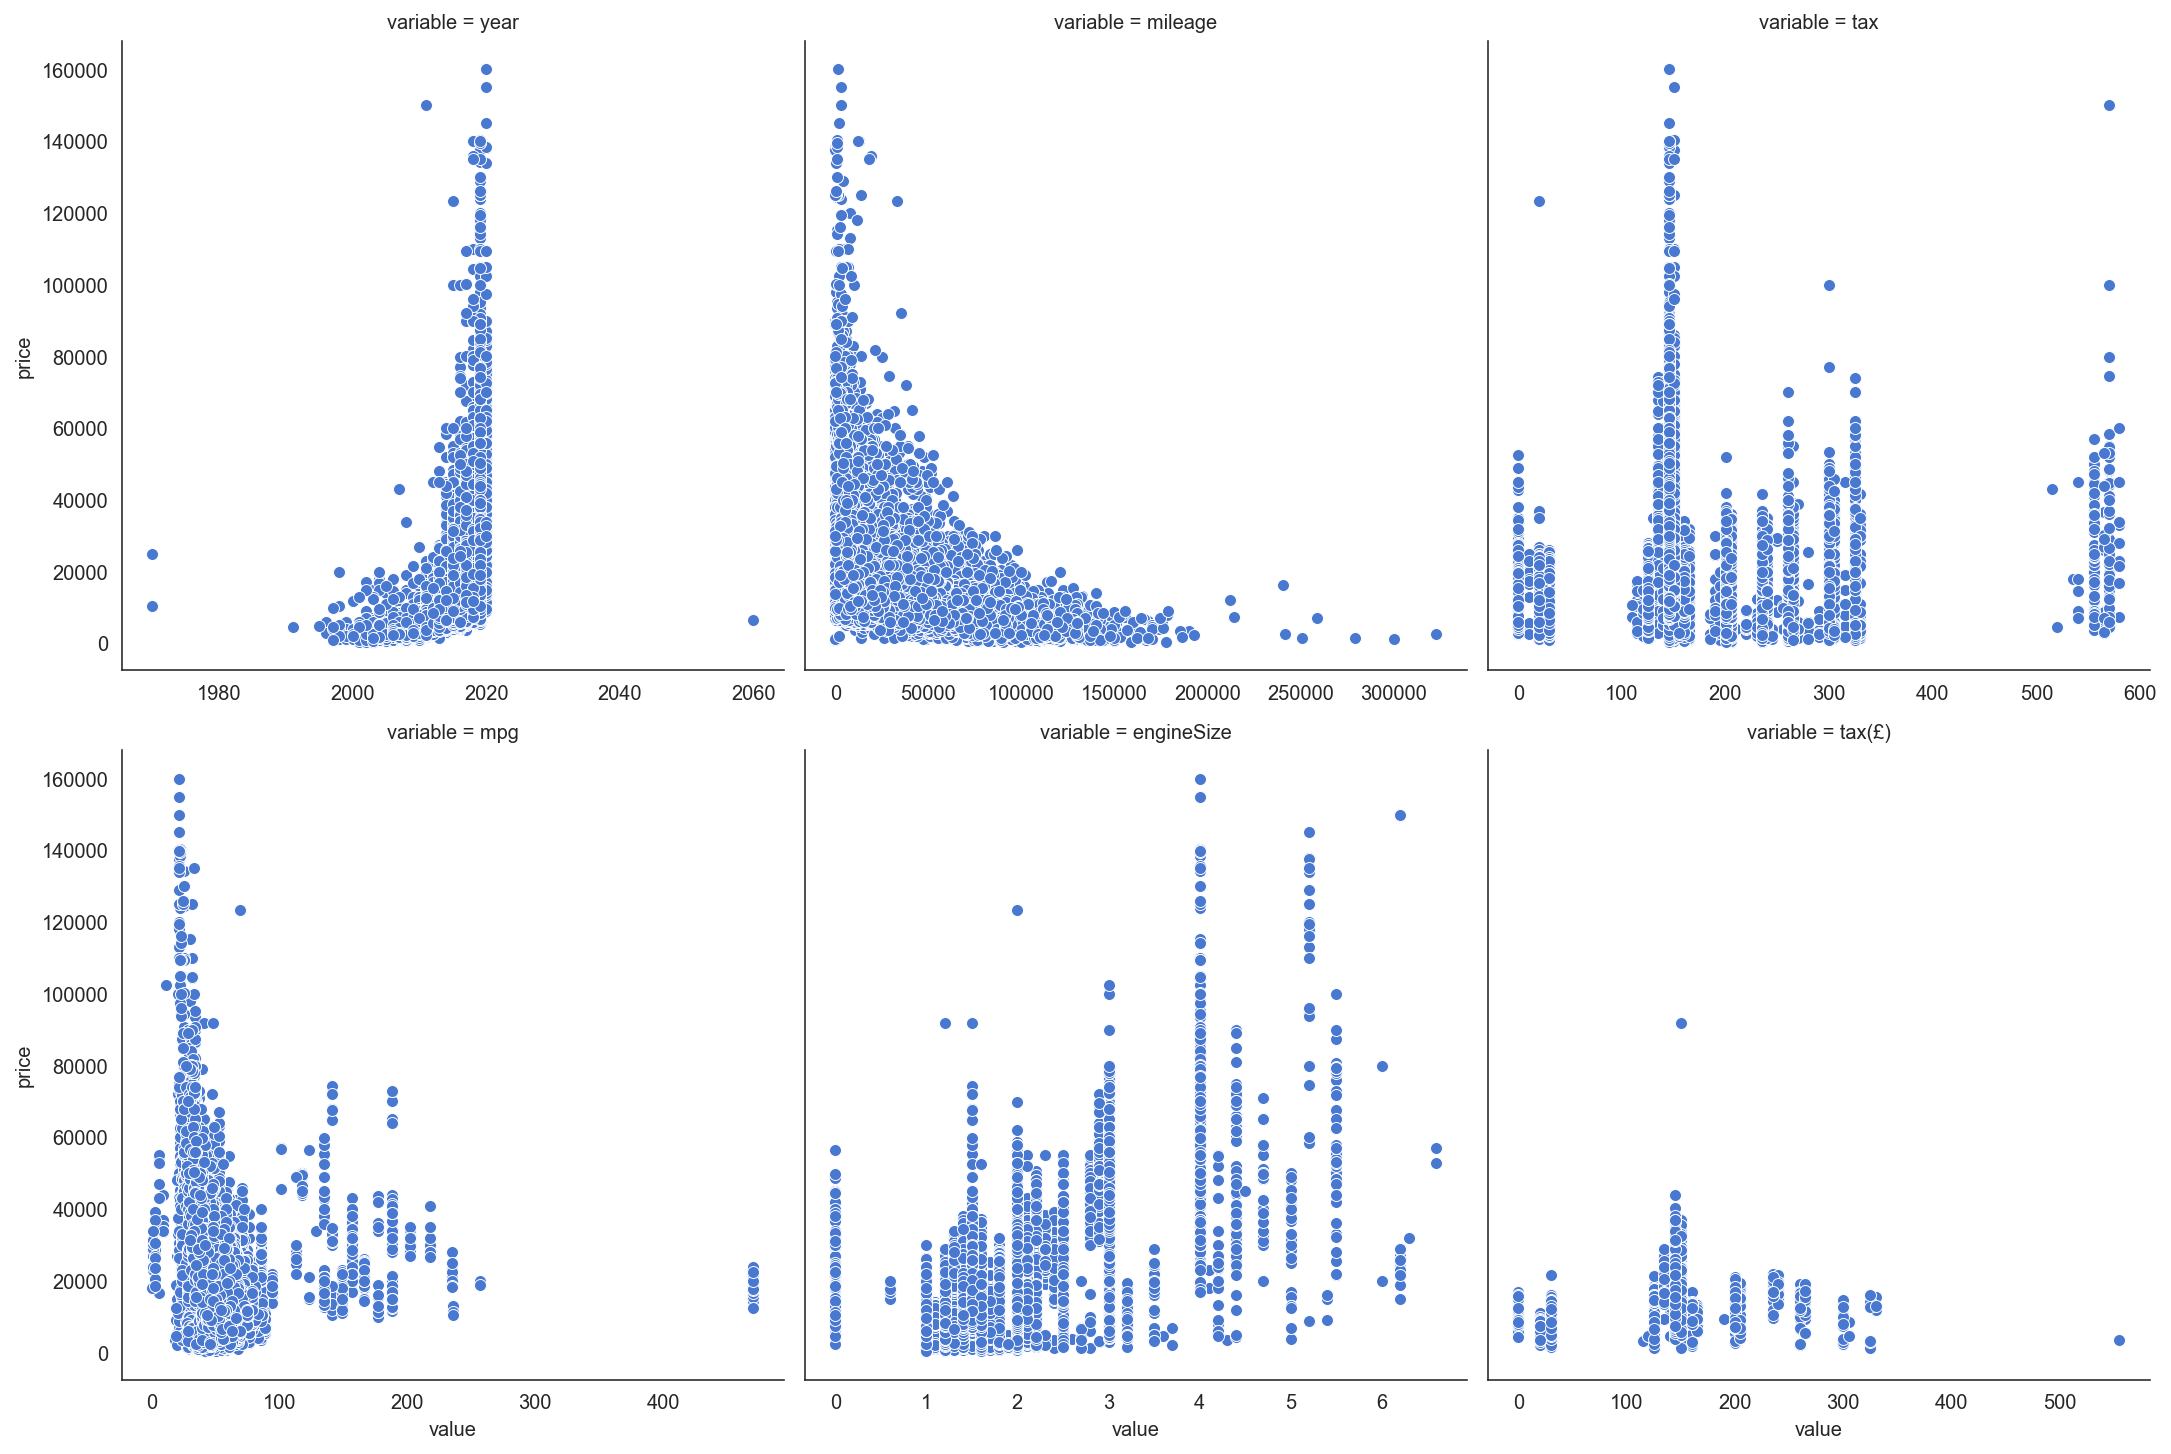

In [14]:
sns.relplot(
    data=df.select_dtypes('number').melt(id_vars=['price']),
    x='value', y='price', col='variable',
    col_wrap=3, facet_kws=dict(sharex=False)
    )

Analyzing categorical data with scatterplots is also OK

<AxesSubplot:xlabel='transmission', ylabel='price'>

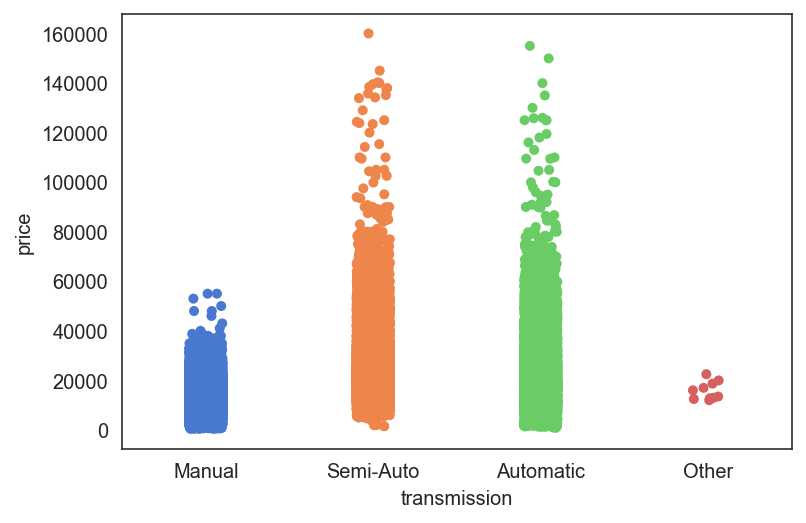

In [15]:
sns.stripplot(data=df, x='transmission', y='price')
# sns.violinplot(data=df, x='transmission', y='price')
# sns.swarmplot(data=df.sample(500), x='transmission', y='price')
# sns.stripplot(data=df.sample(500), x='transmission', y='price', linewidth=1)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

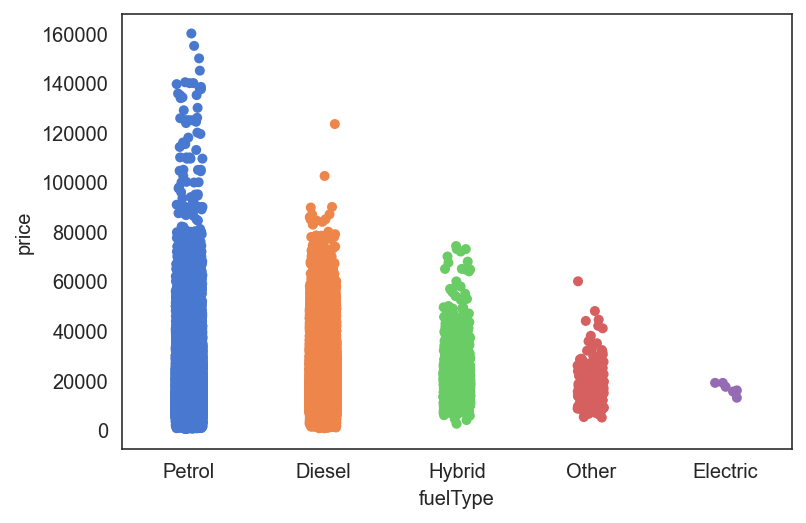

In [16]:
sns.stripplot(data=df, x='fuelType', y='price')

### Questions to the dataset
Find the answer, then send your answer and solution (code that helped you to find the answer) to the lecture channel in Teams. We won't grade your solutions, but we'll discuss different approaches (if there will be any differences).

***Q***: Which brands sell "almost new" cars (with mileage less than 3000 miles)? 

***Q***: For which brands selling "almost new" cars (with mileage less than 3000 miles) is common? On the other side, which brands are rarely sold again shortly after the first purchase?

***Q***: what is the reasonable price for a Skoda Octavia produced less than 3 years ago?

***Q***: is there any correlation between engine size and price?

## Build the simplest solution

In [17]:
def get_price_baseline(car):
    return df.price.mean()

## Build the second simplest solution

Questions to the customer:

- which errors are tolerable?
- which precision is necessary (e.g. 10K/15K/20K is good enough or precision up to £100 is needed)?

Customer needs 4 categories:
- very cheap
- not expensive
- pricey
- very expensive

In [18]:
df.price.quantile([0.05, 0.4, 0.9])

0.05     6499.0
0.40    12698.0
0.90    28900.0
Name: price, dtype: float64

In [19]:
def price_to_category(price: int):
    return 'very cheap' if price < 6500 else \
           'not expensive' if price < 13000 else \
           'pricey' if price < 28900 else 'very expensive'

df['price_category'] = df.price.map(price_to_category)

**Task**: create a function that would return the estimated price category of a car based on the car's description

In [20]:
from typing import Dict
def get_price(car: Dict):
    """
    car: dict - a dictionary that contains the description of a car. 
    Dictionary keys are identical to column names in `df`
    
    Example:
    > get_price(dict(brand='bmw', model='x3', transmission='Automatic', mpg=54.3, mileage=5000))
    """
    return df.price.mean()

## Compare solutions

**Task**: compare at least two different solutions that you came up with or that were discussed in the classroom on new data.

In [21]:
test_data = [
  {
    "brand": "audi",
    "model": " Q3",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 8000,
    "fuelType": "Diesel",
    "tax": 150.0,
    "mpg": 47.1,
    "engineSize": 2.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2017.0,
    "transmission": "Manual",
    "mileage": 43666,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 49.6,
    "engineSize": 1.6
  },
  {
    "brand": "focus",
    "model": " Focus",
    "year": 2018.0,
    "transmission": "Manual",
    "mileage": 13470,
    "fuelType": "Diesel",
    "engineSize": 1.5
  },
  {
    "brand": "audi",
    "model": " A3",
    "year": 2019.0,
    "transmission": "Semi-Auto",
    "mileage": 6777,
    "fuelType": "Petrol",
    "tax": 150.0,
    "mpg": 42.2,
    "engineSize": 1.5
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2017.0,
    "transmission": "Semi-Auto",
    "mileage": 5226,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 30.4,
    "engineSize": 4.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 4500,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 36.7,
    "engineSize": 2.0
  },
  {
    "brand": "Hyundai",
    "model": " I10",
    "year": 2017.0,
    "transmission": "Manual",
    "mileage": 11997,
    "fuelType": "Petrol",
    "mpg": 60.1,
    "engineSize": 1.0,
    "tax(\u00a3)": 145.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " C Class",
    "year": 2014.0,
    "transmission": "Semi-Auto",
    "mileage": 27032,
    "fuelType": "Diesel",
    "tax": 30.0,
    "mpg": 64.2,
    "engineSize": 2.1
  },
  {
    "brand": "Mercedes-Benz",
    "model": " SL CLASS",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 767,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 29.4,
    "engineSize": 3.0
  },
  {
    "brand": "ford",
    "model": " Focus",
    "year": 2018.0,
    "transmission": "Manual",
    "mileage": 9999,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 57.7,
    "engineSize": 1.0
  }
]

# Seminar results

What did we talk about:
- how to formulate business task as machine learning tasks (see "ML task from business task")
- why talking to customer (user, stakeholder) is important (see "Build the second simplest solution")
- sanity checks for data (see "Explore the target variable" and "Explore features and guess connections to target")
- why evaluation is important
- (briefly) why visualization is important

What did we NOT talk about:
- normalization
- (probably) missing value imputation

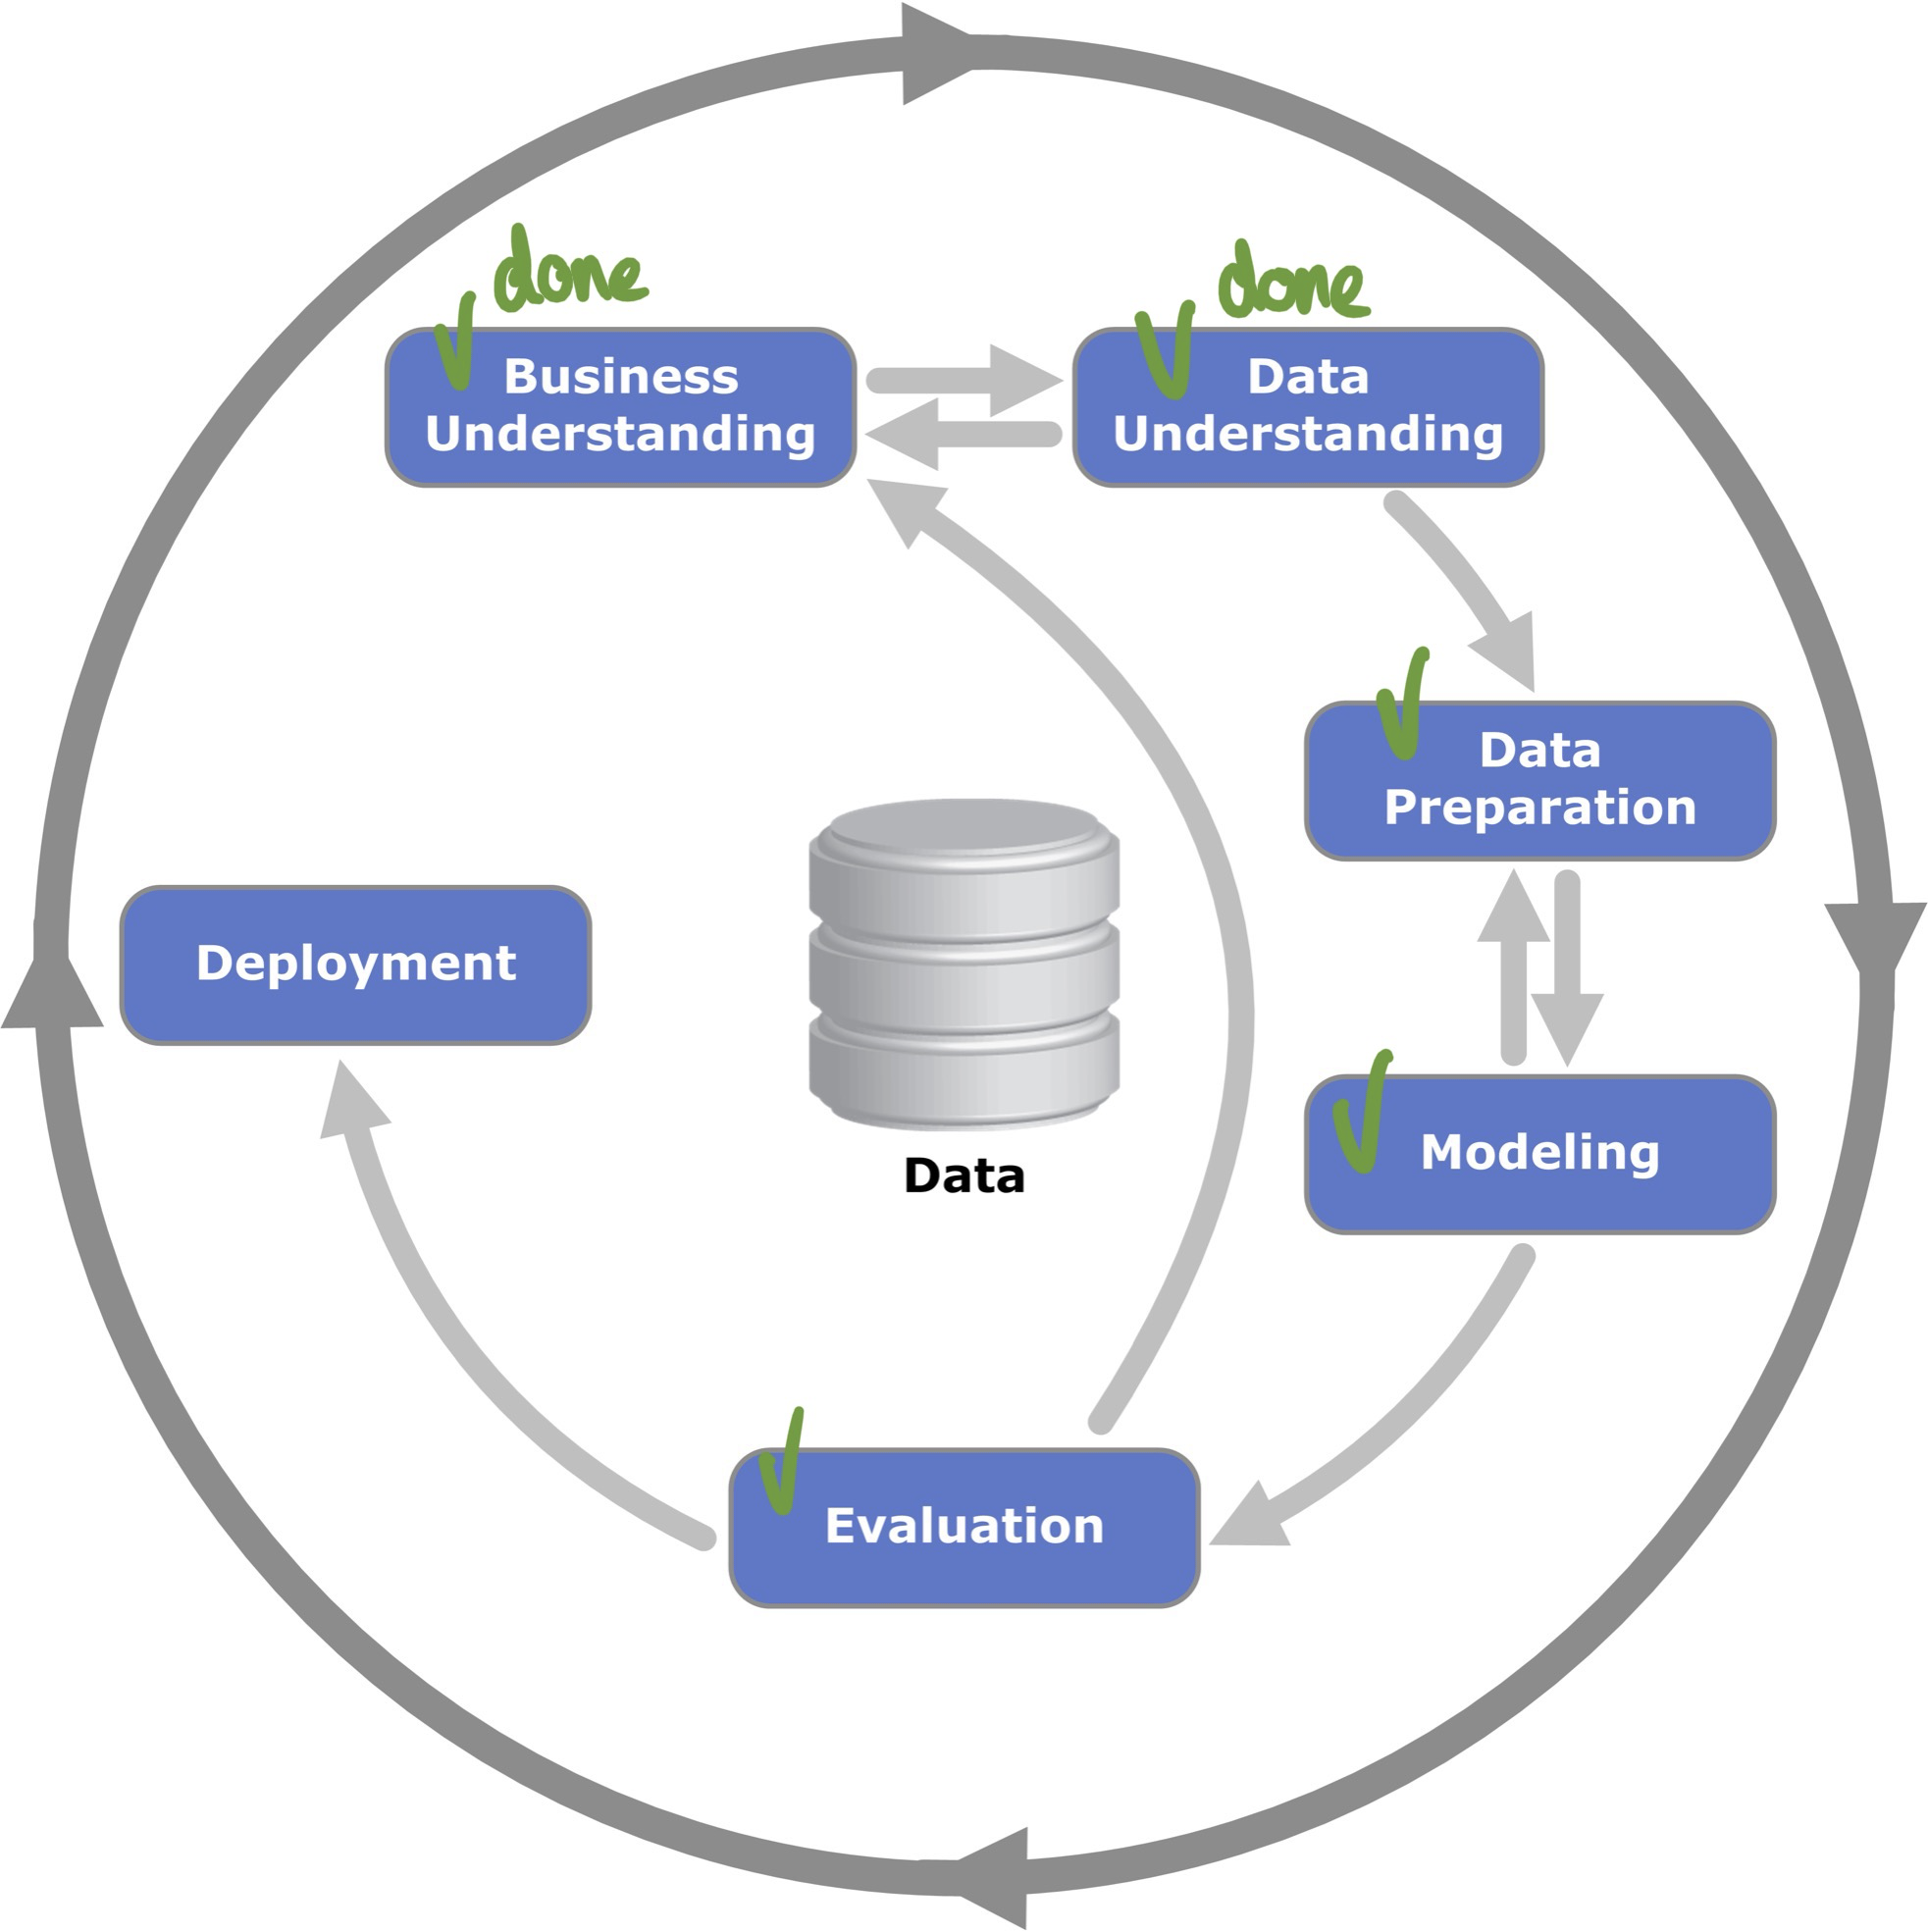